In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from skimage import draw as drw
from skimage import data, color, exposure, img_as_float, img_as_ubyte, morphology, filters 
from skimage import io

import skimage
%matplotlib inline

## 1- Background
Let's visualize an empty scene captured by a fixed camera, and the same scene where objects are present

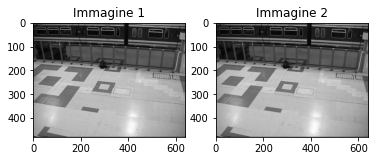

In [2]:
filename='images/es1/EmptyScene01.jpg'
I1=io.imread(filename)
filename='images/es1/EmptyScene02.jpg'
I2=io.imread(filename)
Ig1=img_as_float(color.rgb2gray(I1))
Ig2=img_as_float(color.rgb2gray(I2))

plt.subplot(121)
plt.imshow(Ig1,cmap='gray')
plt.title('Immagine 1')
plt.subplot(122)
plt.imshow(Ig2,cmap='gray')
plt.title('Immagine 2');

Let's try to see the difference in terms of Grayscale intensities of corresponding pixels across the two images

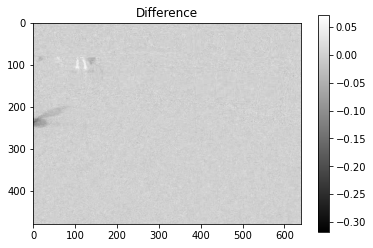

In [3]:
D = Ig1 - Ig2
 
plt.imshow(D,cmap='gray')
plt.title('Difference')
plt.colorbar()
plt.show()

Indeed, the difference seems to be small for most pixels:

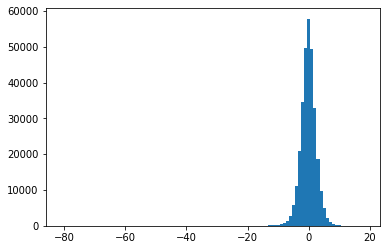

In [4]:
# multiplying by 255 to get a feeling of the differences entity
# with respect to input values
plt.hist(255*D.ravel(),100);

### Analysis

- Comment the histogram you just visualized


## 2- Change detection

You may try out different frames

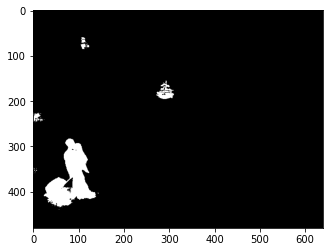

In [5]:
threshold = 0.1 #let's pick a threshold
filename='images/es1/video/frame0251.jpg'
It=io.imread(filename)
Itg=img_as_float(color.rgb2gray(It))
# check slide "Motion segmentation - CHANGE DETECTION"
Dabs=( abs(Ig1 - Itg)> threshold)
plt.imshow(Dabs,cmap='gray')
plt.show()

Have a look at the histogram of the differences to pick a better threshold

In [ ]:
## fill in the code and add comments if appropriate

If you want <b> (meaning it is optional) </b>  you may improve the results with an appropriate post processing. Binary images may be cleaned by means of <a href="https://en.wikipedia.org/wiki/Mathematical_morphology">Morphology operations</a>


In [ ]:
from skimage import morphology as mp
from skimage import data, util
from skimage.measure import label

mask=mp.disk(2) # the structuring element size controls the filling/deletion scale

Dabs=mp.closing(Dabs,mask)
Dabs=skimage.morphology.remove_small_objects(Dabs,100)
plt.imshow(Dabs,cmap='gray')
plt.show()
 